# Predicting IBM Employee Attrition Python Jupyter Notebook

## Part 2 - Build a Logistic Regression Model

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import churn modeling pickle file into a Pandas dataframe called churn_model2. **

In [3]:
churn_model2 = pd.read_pickle('../data/churn_modeling_data.pickle')

** Check number of rows and columns in churn_model2 dataframe. **

In [4]:
churn_model2.shape

(1470, 11)

** View structure of churn_model2 dataframe. **

In [5]:
churn_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
Churn                      1470 non-null int64
Age                        1470 non-null int64
BusTravLevel               1470 non-null int64
DistanceFromHome           1470 non-null int64
EnvironmentSatisfaction    1470 non-null int64
JobInvolvement             1470 non-null int64
MonthlyIncome              1470 non-null int64
Overtime_Dum               1470 non-null int64
Sales_Rep                  1470 non-null uint8
Single                     1470 non-null uint8
StockOptionLevel           1470 non-null int64
dtypes: int64(9), uint8(2)
memory usage: 106.3 KB


** View first five rows of churn_model2 dataframe. **

In [6]:
churn_model2.head()

,Churn,Age,BusTravLevel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,Overtime_Dum,Sales_Rep,Single,StockOptionLevel
0,1,41,1,1,1,2,5993,1,0,1,0
1,0,49,2,8,2,1,5130,0,0,0,1
2,1,37,1,2,3,1,2090,1,0,1,0
3,0,33,2,3,3,2,2909,1,0,0,0
4,0,27,1,2,0,2,3468,0,0,0,1


** Define X and y to split data into training and test sets, and construct logistic regression model. **

In [7]:
feature_cols = ['Age', 'BusTravLevel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome', 
                'Overtime_Dum', 'Sales_Rep', 'Single', 'StockOptionLevel']
X = churn_model2[feature_cols]
y = churn_model2['Churn']

** Decide which random state seed number will provide the highest area under the ROC curve (AUC). **

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
seed_range = range(100, 111)

auc_scores = []

for seed in seed_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred_prob).round(3))

Text(0,0.5,'Logistic Regression AUC Value')

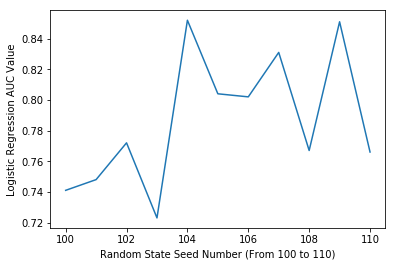

In [10]:
plt.plot(seed_range, auc_scores)
plt.xlabel('Random State Seed Number (From 100 to 110)')
plt.ylabel('Logistic Regression AUC Value')

In [11]:
print(auc_scores)

[0.741, 0.748, 0.772, 0.723, 0.852, 0.804, 0.802, 0.831, 0.767, 0.851, 0.766]


* 104 is the random state seed number that will produce the highest AUC value.

** Split churn / attrition modeling data into training and test sets. **

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104)

In [13]:
print(churn_model2.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 11)
(1102, 10)
(368, 10)


** Fit a logistic regression model on training data set. **

In [14]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

** Print logistic regression model intercept and coefficients. **

In [15]:
print(logreg.intercept_)
dict(zip(feature_cols, logreg.coef_[0]))

[-0.18865456]


{'Age': -0.0274829751500014,
 'BusTravLevel': 0.46911981350227566,
 'DistanceFromHome': 0.028108320637503983,
 'EnvironmentSatisfaction': -0.4071496160619036,
 'JobInvolvement': -0.46555972067784707,
 'MonthlyIncome': -8.220225041555184e-05,
 'Overtime_Dum': 1.6580896530527565,
 'Sales_Rep': 0.7618572071539449,
 'Single': 0.6125197826230039,
 'StockOptionLevel': -0.35917080532394896}

** Express logistic regression model coefficients as odds. **

In [16]:
dict(zip(feature_cols, np.exp(logreg.coef_[0])))

{'Age': 0.9728912457399844,
 'BusTravLevel': 1.5985865195306195,
 'DistanceFromHome': 1.0285070869310544,
 'EnvironmentSatisfaction': 0.6655446066889791,
 'JobInvolvement': 0.6277836233577854,
 'MonthlyIncome': 0.9999178011280968,
 'Overtime_Dum': 5.249273326653939,
 'Sales_Rep': 2.142251132365487,
 'Single': 1.8450747334793316,
 'StockOptionLevel': 0.6982550754810202}

** Make predictions on test data set and calculate test set accuracy. **

In [17]:
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class).round(3))

0.861


** Compute null accuracy manually. **

In [18]:
print(1 - y_test.mean())

0.8396739130434783


** Calculate test set AUC value for logistic regression model. **

In [19]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(metrics.roc_auc_score(y_test, y_pred_prob).round(3))

0.852


** Plot logistic regression model ROC curve for test set. **

Text(0,0.5,'True Positive Rate (Sensitivity)')

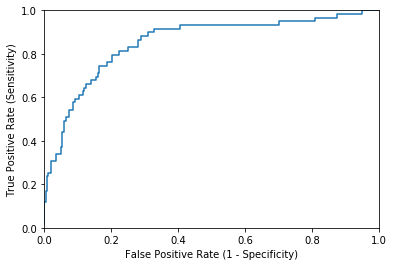

In [20]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

** Print confusion matrix to calculate test set accuracy and error rates plus precision and recall. **

In [21]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[297  12]
 [ 39  20]]


** Calculate test set accuracy rate. **

In [22]:
float(297 + 20) / float(297 + 12 + 39 + 20)

0.8614130434782609

** Calculate test set misclassification / error rate. **

In [23]:
float(39 + 12) / float(297 + 12 + 39 + 20)

0.13858695652173914

** Calculate precision to measure how confident the logistic regression model is for capturing the positives in test set. **

In [24]:
float(20) / float(20 + 12)

0.625

** Calculate recall / sensitivity to measure how well the logistic regression model is capturing the positives in test set. **

In [25]:
float(20) / float(39 + 20)

0.3389830508474576

** Calculate specificity to measure how well the logistic regression model is capturing the negatives in test set. **

In [26]:
float(297) / float(297 + 12)

0.9611650485436893

** Print out test set classification report for logistic regression model. **

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.88      0.96      0.92       309
          1       0.62      0.34      0.44        59

avg / total       0.84      0.86      0.84       368



** List out false positives in test data set. **

In [29]:
X_test[y_test < y_pred_class]

,Age,BusTravLevel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,Overtime_Dum,Sales_Rep,Single,StockOptionLevel
665,47,1,2,3,1,3294,1,1,1,0
632,42,2,2,1,2,2515,1,0,1,0
1308,38,1,2,1,0,5405,1,1,0,2
1188,29,1,5,0,1,4187,1,0,0,1
55,33,2,1,0,2,13458,1,0,1,0
318,27,1,5,2,2,2478,1,0,1,0
1102,36,1,2,2,2,2644,1,1,1,0
284,26,2,11,0,2,4741,1,0,0,1
652,37,0,19,0,2,7642,1,0,1,0
909,19,1,25,1,3,2994,1,0,1,0


** List out false negatives in test data set. **

In [30]:
X_test[y_test > y_pred_class]

,Age,BusTravLevel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,Overtime_Dum,Sales_Rep,Single,StockOptionLevel
1442,29,1,1,0,2,4787,1,0,0,3
645,29,1,1,1,1,2800,1,1,0,3
1246,30,2,8,2,1,2180,0,0,0,1
439,31,2,20,0,2,9824,0,0,0,0
293,26,1,4,3,1,5828,1,0,1,0
1333,46,1,10,2,2,7314,0,0,0,3
573,26,1,8,3,1,5326,0,0,1,0
2,37,1,2,3,1,2090,1,0,1,0
480,30,2,12,1,1,2033,0,1,0,1
997,27,1,17,3,2,2394,1,0,1,0


** List out whole sample logistic regression model accuracy scores and their average using 10-fold cross-validation. **

In [31]:
from sklearn.cross_validation import cross_val_score

C:\Users\kyrma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
acc_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').round(3)
print(acc_scores)
print(acc_scores.mean().round(3))

[0.885 0.865 0.872 0.864 0.864 0.837 0.85  0.842 0.863 0.856]
0.86


** List out whole sample logistic regression model AUC values and their average using 10-fold cross-validation. **

In [33]:
auc_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').round(3)
print(auc_scores)
print(auc_scores.mean().round(3))

[0.799 0.875 0.864 0.698 0.86  0.743 0.808 0.745 0.826 0.724]
0.794
